<a href="https://colab.research.google.com/github/YashNigam65/gitfolder/blob/master/assignment_4_house_price_3d_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
write a python program to draw the 3d plot for the model developed for

house price prediction using suitable python based 3d plotting

libraries

In [2]:
# python implementation of multivariate linear Regression on using house price prediction dataset

# step 1: import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# step 2: reading the data and splitting it to input and output
dataset = pd.read_csv('https://raw.githubusercontent.com/enuguru/aiandml/refs/heads/master/machine_learning_algorithms_using_frameworks/python_files/regression/house_price_prediction/home.csv')
#inputx = dataset.iloc[:, :-1].values
inputx = dataset.iloc[:, 0:2].values
outputy = dataset.iloc[:, 2].values
print(inputx)

[[1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]
 [1940    4]
 [2000    3]
 [1890    3]
 [4478    5]
 [1268    3]
 [2300    4]
 [1320    2]
 [1236    3]
 [2609    4]
 [3031    4]
 [1767    3]
 [1888    2]
 [1604    3]
 [1962    4]
 [3890    3]
 [1100    3]
 [1458    3]
 [2526    3]
 [2200    3]
 [2637    3]
 [1839    2]
 [1000    1]
 [2040    4]
 [3137    3]
 [1811    4]
 [1437    3]
 [1239    3]
 [2132    4]
 [4215    4]
 [2162    4]
 [1664    2]
 [2238    3]
 [2567    4]
 [1200    3]
 [ 852    2]
 [1852    4]
 [1203    3]]


In [5]:
# step 3: select one fourth of the data for testing and two thirds for training
input_train, input_test, output_train, output_test = train_test_split(inputx, outputy, test_size = 1/4, random_state = 0)


In [7]:
# step 4: selecting the simple Linear Regression model
model = LinearRegression()

model.fit(input_train, output_train)


LinearRegression()

In [8]:
# step 5: testing or model prediction using testinput
squarefeet = float(input("\nGive square feet of the house  "))
bedrooms = float(input("\nGive the number of bed rooms in the house  "))
testinput = [[squarefeet,bedrooms]]
predicted_output = model.predict(testinput)
print('\nThe test input is as follows ',testinput)
print('\nThe predicted house price is ',predicted_output)
yes = input("\nCan I proceed\n")



Give square feet of the house  1000

Give the number of bed rooms in the house  2

The test input is as follows  [[1000.0, 2.0]]

The predicted house price is  [213595.57425024]

Can I proceed
yes


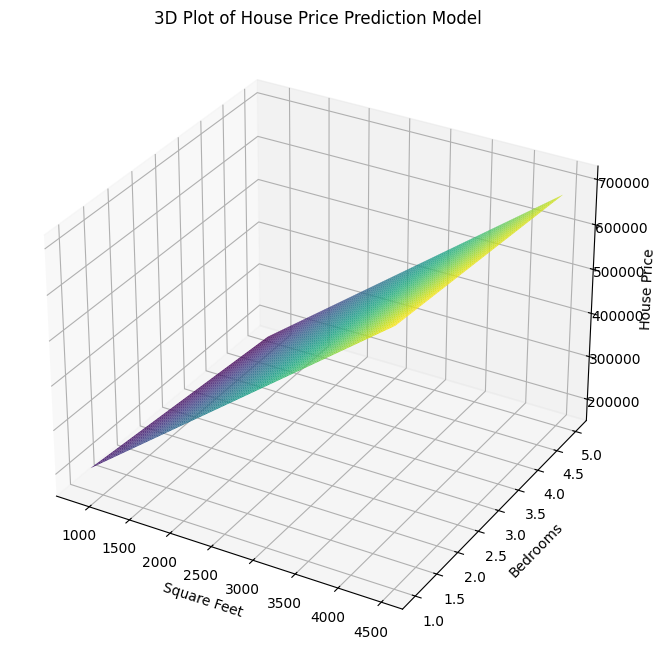

In [9]:
# step 6: Visualizing the results in a 3D plot

from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for square feet and bedrooms
squarefeet_range = np.linspace(inputx[:, 0].min(), inputx[:, 0].max(), 100)
bedrooms_range = np.linspace(inputx[:, 1].min(), inputx[:, 1].max(), 100)
sf_mesh, br_mesh = np.meshgrid(squarefeet_range, bedrooms_range)

# Predict prices for the meshgrid
predicted_prices = model.predict(np.c_[sf_mesh.ravel(), br_mesh.ravel()])
predicted_prices = predicted_prices.reshape(sf_mesh.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(sf_mesh, br_mesh, predicted_prices, cmap='viridis')

ax.set_xlabel('Square Feet')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('House Price')
ax.set_title('3D Plot of House Price Prediction Model')

plt.show()